In [1]:
import sys, os
sys.path.append(os.path.abspath('../..'))

# GPU Acceleration
GPU Acceleration is turned on by default if cupy is installed. For instructions on how to install cupy, see the README.md file. It can be turned off in the Model Settings:

In [2]:
# load modules
from fridom.ShallowWater.ModelSettings import ModelSettings
from fridom.ShallowWater.Grid import Grid
from fridom.ShallowWater.Model import Model
from fridom.ShallowWater.InitialConditions import SingleWave

In [ ]:
# turning off GPU acceleration:
mset = ModelSettings(gpu=False, N=[256, 256])
grid = Grid(mset)
model = Model(mset, grid)
model.z = SingleWave(mset, grid)
model.run(runlen=1)
model.timer

In [ ]:
# For comparison, here is the same code with GPU acceleration:
mset = ModelSettings(gpu=True, N=[256, 256])
grid = Grid(mset)
model = Model(mset, grid)
model.z = SingleWave(mset, grid)
model.run(runlen=1)
model.timer

In this example, the code with gpu acceleration is not faster then without. The advantage of gpu accelaration becomes visible at much larger Resolution, consider for example the same code as before but with a resolution of 2048x2048:

In [ ]:
mset = ModelSettings(gpu=True, N=[2**11, 2**11], dt=2**-11)
grid = Grid(mset)
model = Model(mset, grid)
model.z = SingleWave(mset, grid)
model.run(steps=1000)
model.timer

# Benchmarking single GPU vs single CPU

100%|██████████| 1024/1024 [01:50<00:00,  9.26it/s]


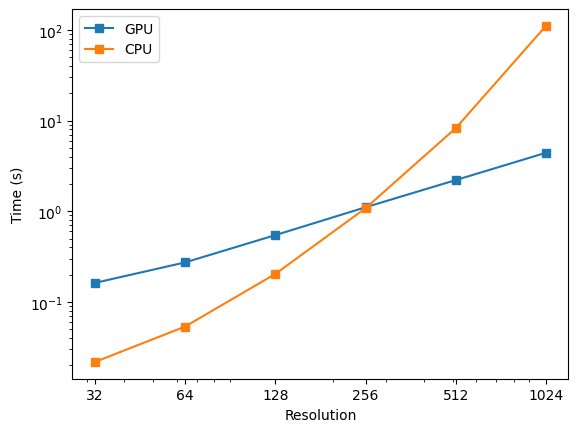

In [3]:
import time
import matplotlib.pyplot as plt

def model_time(res, gpu):
    mset = ModelSettings(N=[res, res], dt=1/res, gpu=gpu)
    grid = Grid(mset)
    m = Model(mset, grid)
    m.z = SingleWave(mset, grid)
    start_time = time.time()
    m.run(runlen=1)
    return time.time() - start_time

resolutions = [2**i for i in range(5, 11)]
gpu_times = [model_time(res, True) for res in resolutions]
cpu_times = [model_time(res, False) for res in resolutions]

plt.plot(resolutions, gpu_times, label="GPU", marker="s")
plt.plot(resolutions, cpu_times, label="CPU", marker="s")
plt.xlabel("Resolution")
plt.ylabel("Time (s)")
plt.xscale("log")
plt.yscale("log")
plt.xticks(resolutions, resolutions)
plt.legend()